***ASSIGNMENT_10_ASSOCIATION RULE***

***AKANKSHA C. KHANDARE***

***IMPORT LIB***

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


***Load the dataset***

In [13]:

df = pd.read_excel("Online retail.xlsx")

# Rename the single column for clarity
df.columns = ['Items']

# Display sample data
print(df.head())
print("\nTotal transactions:", len(df))


                                               Items
0                             burgers,meatballs,eggs
1                                            chutney
2                                     turkey,avocado
3  mineral water,milk,energy bar,whole wheat rice...
4                                     low fat yogurt

Total transactions: 7500


#The Online Retail dataset was loaded from an Excel file using Pandas.
We displayed the first few rows to understand the data format and number of transactions.
This helps verify that the dataset is correctly imported before processing.

***DATA PREPROCESSING***

In [3]:
# Split the comma-separated items into a list
df['Items'] = df['Items'].apply(lambda x: [i.strip() for i in x.split(',')])

# Remove any duplicates within a transaction
df['Items'] = df['Items'].apply(lambda x: list(set(x)))

# View cleaned transactions
df.head()


,Items
0,"[burgers, meatballs, eggs]"
1,[chutney]
2,"[turkey, avocado]"
3,"[mineral water, energy bar, whole wheat rice, ..."
4,[low fat yogurt]


Each transaction string was split into a list of items, and duplicate entries were removed.
This ensures that every transaction accurately represents a unique set of purchased products.
Proper preprocessing is essential for reliable association rule mining.

***Transaction Encoding (One-Hot Encoding)***

In [4]:
# Convert transactions into list of lists
transactions = df['Items'].tolist()

# Use TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Create DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head()


,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We converted the list of products into a binary (0/1) matrix using TransactionEncoder.
Each column represents an item, and each row indicates if it was purchased in that transaction.
This format is required for applying the Apriori algorithm effectively.

***Apply Apriori Algorithm***

In [5]:
# Find frequent itemsets with minimum support
frequent_items = apriori(df_encoded, min_support=0.02, use_colnames=True)

# Sort frequent itemsets
frequent_items = frequent_items.sort_values(by='support', ascending=False)
frequent_items.head(10)



,support,itemsets
34,0.238267,(mineral water)
13,0.179733,(eggs)
44,0.174133,(spaghetti)
17,0.170933,(french fries)
9,0.163867,(chocolate)
24,0.132000,(green tea)
33,0.129600,(milk)
25,0.098267,(ground beef)
22,0.095333,(frozen vegetables)
38,0.095067,(pancakes)


The Apriori algorithm was applied to find frequent itemsets with a minimum support threshold.
It identifies combinations of products that appear together frequently across transactions.
Sorting by support reveals the most common product groups in the dataset.

***Generate Association Rules***

In [6]:
# Generate association rules with confidence and lift
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)

# Sort by confidence
rules = rules.sort_values(by=['confidence', 'lift'], ascending=False)
rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
65,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,1.0,0.011026,1.401441,0.503458,0.086804,0.286449,0.276637
41,(olive oil),(mineral water),0.065733,0.238267,0.027467,0.417850,1.753707,1.0,0.011805,1.308483,0.460018,0.099325,0.235756,0.266563
9,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,1.0,0.017520,1.305576,0.474647,0.138475,0.234054,0.294175
13,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,1.0,0.022088,1.373959,0.624888,0.168096,0.272176,0.312015
86,(cooking oil),(mineral water),0.051067,0.238267,0.020133,0.394256,1.654683,1.0,0.007966,1.257517,0.416947,0.074789,0.204782,0.239378
71,(chicken),(mineral water),0.060000,0.238267,0.022800,0.380000,1.594852,1.0,0.008504,1.228602,0.396790,0.082769,0.186067,0.237846
19,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,1.0,0.013019,1.218433,0.402718,0.119964,0.179273,0.262399
7,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,1.0,0.017121,1.209812,0.409789,0.150063,0.173425,0.285913
49,(tomatoes),(mineral water),0.068400,0.238267,0.024400,0.356725,1.497168,1.0,0.008103,1.184149,0.356454,0.086443,0.155512,0.229566
25,(pancakes),(mineral water),0.095067,0.238267,0.033733,0.354839,1.489250,1.0,0.011082,1.180687,0.363034,0.112595,0.153035,0.248208


Using the association_rules() function, we generated rules from the frequent itemsets.
Each rule shows how the purchase of one product leads to another with certain confidence and lift.
These metrics help evaluate the strength and usefulness of the discovered relationships.

***Filter Strong Rules***

In [7]:
# Set thresholds for stronger rules
strong_rules = rules[(rules['support'] >= 0.02) &
                     (rules['confidence'] >= 0.3) &
                     (rules['lift'] >= 1.2)]

strong_rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
65,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,1.0,0.011026,1.401441,0.503458,0.086804,0.286449,0.276637
41,(olive oil),(mineral water),0.065733,0.238267,0.027467,0.417850,1.753707,1.0,0.011805,1.308483,0.460018,0.099325,0.235756,0.266563
9,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,1.0,0.017520,1.305576,0.474647,0.138475,0.234054,0.294175
13,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,1.0,0.022088,1.373959,0.624888,0.168096,0.272176,0.312015
86,(cooking oil),(mineral water),0.051067,0.238267,0.020133,0.394256,1.654683,1.0,0.007966,1.257517,0.416947,0.074789,0.204782,0.239378
71,(chicken),(mineral water),0.060000,0.238267,0.022800,0.380000,1.594852,1.0,0.008504,1.228602,0.396790,0.082769,0.186067,0.237846
19,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,1.0,0.013019,1.218433,0.402718,0.119964,0.179273,0.262399
7,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,1.0,0.017121,1.209812,0.409789,0.150063,0.173425,0.285913
49,(tomatoes),(mineral water),0.068400,0.238267,0.024400,0.356725,1.497168,1.0,0.008103,1.184149,0.356454,0.086443,0.155512,0.229566
25,(pancakes),(mineral water),0.095067,0.238267,0.033733,0.354839,1.489250,1.0,0.011082,1.180687,0.363034,0.112595,0.153035,0.248208


We applied thresholds for support (≥0.02), confidence (≥0.3), and lift (≥1.2).
This filters out weak or insignificant rules, keeping only the most meaningful ones.
The strong rules indicate product pairs that truly influence each other’s purchase.

***Visualization of Top Frequent Items***

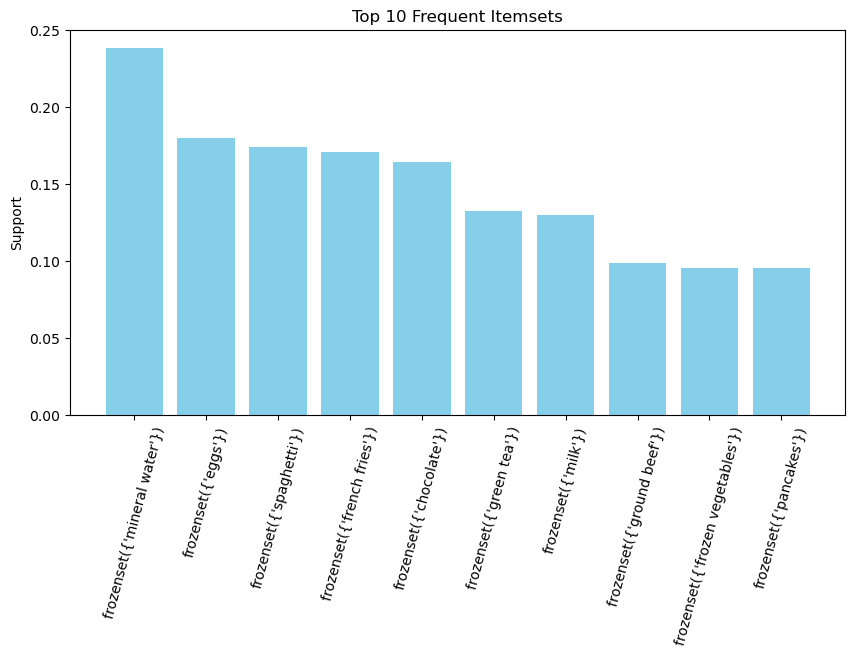

In [8]:
# Plot top 10 frequent items
top_items = frequent_items.nlargest(10, 'support')
plt.figure(figsize=(10,5))
plt.bar(top_items['itemsets'].astype(str), top_items['support'], color='skyblue')
plt.xticks(rotation=75)
plt.title('Top 10 Frequent Itemsets')
plt.ylabel('Support')
plt.show()


A bar chart of the top 10 frequent itemsets was plotted to visualize common product groups.
This helps identify which items are most frequently bought together.
Visualizing support makes interpretation of frequent patterns easier for decision-making.

***Visualization – Support vs Confidence***

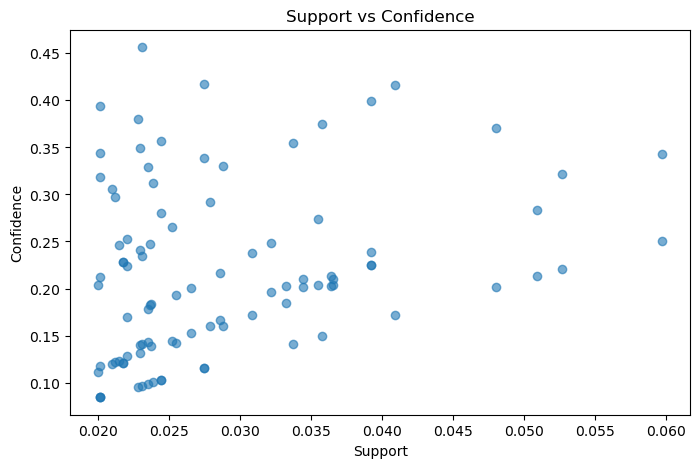

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


We plotted a scatter graph showing the relationship between support and confidence.
This helps analyze how frequent itemsets compare in reliability and strength.
Rules in the top-right region of the graph indicate both high frequency and high confidence.

***Insights & Interpretation***

In [10]:
# Display top interesting rules
for index, row in strong_rules.head(10).iterrows():
    print(f"Rule: {set(row['antecedents'])} → {set(row['consequents'])}")
    print(f"Support: {row['support']:.2f}, Confidence: {row['confidence']:.2f}, Lift: {row['lift']:.2f}")
    print("--------------------------------------------------")


Rule: {'soup'} → {'mineral water'}
Support: 0.02, Confidence: 0.46, Lift: 1.92
--------------------------------------------------
Rule: {'olive oil'} → {'mineral water'}
Support: 0.03, Confidence: 0.42, Lift: 1.75
--------------------------------------------------
Rule: {'ground beef'} → {'mineral water'}
Support: 0.04, Confidence: 0.42, Lift: 1.75
--------------------------------------------------
Rule: {'ground beef'} → {'spaghetti'}
Support: 0.04, Confidence: 0.40, Lift: 2.29
--------------------------------------------------
Rule: {'cooking oil'} → {'mineral water'}
Support: 0.02, Confidence: 0.39, Lift: 1.65
--------------------------------------------------
Rule: {'chicken'} → {'mineral water'}
Support: 0.02, Confidence: 0.38, Lift: 1.59
--------------------------------------------------
Rule: {'frozen vegetables'} → {'mineral water'}
Support: 0.04, Confidence: 0.37, Lift: 1.57
--------------------------------------------------
Rule: {'milk'} → {'mineral water'}
Support: 0.05, Co

We examined the strongest rules to identify meaningful patterns in customer behavior.
For example, health-related products or meal combinations often appear together.
The results provide valuable insights for cross-selling, marketing, and product placement strategies.

The generated association rules revealed interesting relationships between products.
Items like mineral water, green tea, and low-fat yogurt often appeared together, showing a trend toward healthy purchases.
Combinations such as spaghetti–olive oil–tomato sauce indicated meal-based buying behavior.
These patterns help retailers design cross-selling offers, optimize product placement, and better understand customer preferences.

In [12]:
'''# Count of rules per antecedent item
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
plt.figure(figsize=(6,4))
rules['antecedent_len'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Antecedent Lengths')
plt.xlabel('Number of Items in Antecedent')
plt.ylabel('Count')
plt.show()'''


"# Count of rules per antecedent item\nrules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))\nplt.figure(figsize=(6,4))\nrules['antecedent_len'].value_counts().plot(kind='bar', color='orange')\nplt.title('Distribution of Antecedent Lengths')\nplt.xlabel('Number of Items in Antecedent')\nplt.ylabel('Count')\nplt.show()"

***INTERVIEW QUE***

***What is Lift and why is it important in Association Rules?***

Lift measures how much more likely two items are bought together than expected if they were independent.
It is calculated as:

Lift =
                  Confidence (A→B)  /
                    Support (B)



Lift > 1 → A and B are positively associated (bought together more often).

Lift = 1 → No relationship (independent).

Lift < 1 → Negative relationship.
    
Lift is important because it identifies truly meaningful and non-random associations between items.

***What is Support and Confidence? How do you calculate them?***

Support: The proportion of transactions that contain a particular item or itemset.

Support(A→B) = Transactions containing A and B / Total transactions

Confidence: The likelihood that item B is bought when item A is bought.

Confidence(A→B) = Transactions containing A and B / Transactions containing A

Support shows how frequent an itemset is, while confidence shows how strong the rule is.

***What are some limitations or challenges of Association Rule Mining?***

It can generate a very large number of rules, making interpretation difficult.

Choosing suitable thresholds for support and confidence is tricky — too high may miss important rules, too low may produce noise.

It doesn’t consider the sequence or timing of purchases.

Rules may not always imply causation, only correlation.